In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#pd.options.plotting.backend = "plotly"
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from datetime import datetime



#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sklearn
import matplotlib
import seaborn as sns; sns.set()
import scipy.stats as stats

In [3]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

In [4]:
def box_cox_transformer(data):
    from sklearn.preprocessing import PowerTransformer, MinMaxScaler
    from sklearn.pipeline import Pipeline 

    scaler = MinMaxScaler(feature_range=(1, 2)) # Box-Cox requiere que los valores de entrada sean positivos.
    power = PowerTransformer(method= 'box-cox' )
    pipeline = Pipeline(
        steps=[
           ( 's' , scaler),
           ( 'p' , power)
    ])
    
    transformed_data = pipeline.fit_transform(np.array(data).reshape((-1, 1)))
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    sns.histplot(data, ax = axes[0] ,bins = 10, kde = True, kde_kws = {'bw_adjust' : 5})
    axes[0].set_title(data.name + ' original')
    sns.histplot(transformed_data, ax = axes[1], bins = 10, kde = True, kde_kws = {'bw_adjust' : 5})
    axes[1].set_title(data.name + ' Box-Cox transformed')
    
    return transformed_data  

In [5]:
all_data = pd.read_csv(r'C:\Users\alexb\Documents\Facultad\UBA\Análisis de datos\Dataset Kaggle\weatherAUS.csv', delimiter=',', sep='\n', decimal='.')

In [6]:
# SEPARO TRAIN Y TEST_CV SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_data.drop(columns = ['Rainfall', 'RainTomorrow']), all_data[['Rainfall', 'RainTomorrow']], test_size = 0.2, random_state = 27)
data = pd.concat([X_train, y_train], axis=1)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116368 entries, 15500 to 5139
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           116368 non-null  object 
 1   Location       116368 non-null  object 
 2   MinTemp        115196 non-null  float64
 3   MaxTemp        115339 non-null  float64
 4   Evaporation    66165 non-null   float64
 5   Sunshine       60520 non-null   float64
 6   WindGustDir    108130 non-null  object 
 7   WindGustSpeed  108179 non-null  float64
 8   WindDir9am     107974 non-null  object 
 9   WindDir3pm     113019 non-null  object 
 10  WindSpeed9am   114980 non-null  float64
 11  WindSpeed3pm   113938 non-null  float64
 12  Humidity9am    114258 non-null  float64
 13  Humidity3pm    112781 non-null  float64
 14  Pressure9am    104359 non-null  float64
 15  Pressure3pm    104389 non-null  float64
 16  Cloud9am       71566 non-null   float64
 17  Cloud3pm       68754 non-nu

In [8]:
data.head()

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Rainfall,RainTomorrow
15500,2010-01-29,Newcastle,19.4,30.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,23.5,NaN,Yes,27.8,Yes
28932,2014-01-29,Richmond,15.0,38.5,7.3,NaN,ESE,35.0,NaN,SE,...,22.0,1016.9,1012.2,NaN,NaN,21.5,37.4,No,0.0,No
69452,2014-11-28,Melbourne,12.1,21.0,6.4,10.1,SSW,35.0,ESE,SSE,...,53.0,1024.3,1020.5,NaN,NaN,14.2,19.8,No,0.0,No
13400,2012-09-25,Moree,3.5,27.3,7.2,11.7,ENE,31.0,ESE,ESE,...,15.0,1018.4,1014.1,4.0,1.0,17.8,26.4,No,0.0,No
13319,2012-07-06,Moree,2.0,19.2,NaN,NaN,ESE,33.0,SE,SSE,...,30.0,1029.3,1026.1,NaN,NaN,11.8,18.3,No,0.0,No


In [9]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Rainfall,RainTomorrow
4848,2014-03-13,BadgerysCreek,17.7,26.3,NaN,NaN,S,31.0,SW,ENE,...,59.0,1020.8,1017.8,NaN,NaN,19.1,24.9,No,0.2,No
14879,2016-12-11,Moree,18.6,33.2,NaN,NaN,NNE,48.0,NNE,N,...,26.0,1020.5,1017.2,NaN,NaN,23.1,31.0,No,0.0,No
36680,2009-06-01,WaggaWagga,8.1,14.8,3.8,0.2,ENE,46.0,E,ENE,...,65.0,1031.4,1029.1,8.0,8.0,12.4,14.0,No,1.0,No
118456,2011-05-08,PerthAirport,15.2,29.9,6.8,8.4,NaN,NaN,SSE,NE,...,22.0,1019.2,1016.0,3.0,7.0,20.0,28.8,No,0.0,No
5139,2014-12-29,BadgerysCreek,14.3,32.2,NaN,NaN,W,63.0,N,NNE,...,42.0,1009.5,1002.9,NaN,NaN,20.9,31.5,No,0.0,No


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116368 entries, 15500 to 5139
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           116368 non-null  object 
 1   Location       116368 non-null  object 
 2   MinTemp        115196 non-null  float64
 3   MaxTemp        115339 non-null  float64
 4   Evaporation    66165 non-null   float64
 5   Sunshine       60520 non-null   float64
 6   WindGustDir    108130 non-null  object 
 7   WindGustSpeed  108179 non-null  float64
 8   WindDir9am     107974 non-null  object 
 9   WindDir3pm     113019 non-null  object 
 10  WindSpeed9am   114980 non-null  float64
 11  WindSpeed3pm   113938 non-null  float64
 12  Humidity9am    114258 non-null  float64
 13  Humidity3pm    112781 non-null  float64
 14  Pressure9am    104359 non-null  float64
 15  Pressure3pm    104389 non-null  float64
 16  Cloud9am       71566 non-null   float64
 17  Cloud3pm       68754 non-nu

Se observa que las variables *Evaporation*, *Sunshine*, *Cloud9am* y *Cloud3pm* poseen gran cantidad de datos faltantes, aproximadamente el 40% del total de los datos.

In [11]:
data.describe()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Rainfall
count,115196.000000,115339.000000,66165.000000,60520.000000,108179.000000,114980.000000,113938.000000,114258.000000,112781.000000,104359.000000,104389.000000,71566.000000,68754.000000,114966.000000,113494.000000,113787.000000
mean,12.200798,23.234665,5.465696,7.610496,40.046793,14.041407,18.670461,68.874039,51.540791,1017.639334,1015.239955,4.444666,4.508116,17.000778,21.695903,2.359229
std,6.395974,7.125399,4.220662,3.789557,13.611471,8.917093,8.813004,19.025624,20.813426,7.106676,7.041687,2.888018,2.722047,6.484137,6.942873,8.418078
min,-8.500000,-4.800000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.300000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.500000,0.800000
max,31.900000,47.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.200000,367.600000


In [12]:
# Datos numéricos
numeric_label = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
# Datos categóricos
categoric_label = ['Date', 'Location', 'WindGustDir', 'RainToday', 'RainTomorrow']

In [13]:
data[numeric_label].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
15500,19.4,30.2,27.8,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,2.0,NaN,23.5,NaN
28932,15.0,38.5,0.0,7.3,NaN,35.0,0.0,13.0,75.0,22.0,1016.9,1012.2,NaN,NaN,21.5,37.4
69452,12.1,21.0,0.0,6.4,10.1,35.0,9.0,15.0,69.0,53.0,1024.3,1020.5,NaN,NaN,14.2,19.8
13400,3.5,27.3,0.0,7.2,11.7,31.0,11.0,7.0,35.0,15.0,1018.4,1014.1,4.0,1.0,17.8,26.4
13319,2.0,19.2,0.0,NaN,NaN,33.0,17.0,13.0,57.0,30.0,1029.3,1026.1,NaN,NaN,11.8,18.3


In [14]:
data[categoric_label].head()

,Date,Location,WindGustDir,RainToday,RainTomorrow
15500,2010-01-29,Newcastle,NaN,Yes,Yes
28932,2014-01-29,Richmond,ESE,No,No
69452,2014-11-28,Melbourne,SSW,No,No
13400,2012-09-25,Moree,ENE,No,No
13319,2012-07-06,Moree,ESE,No,No


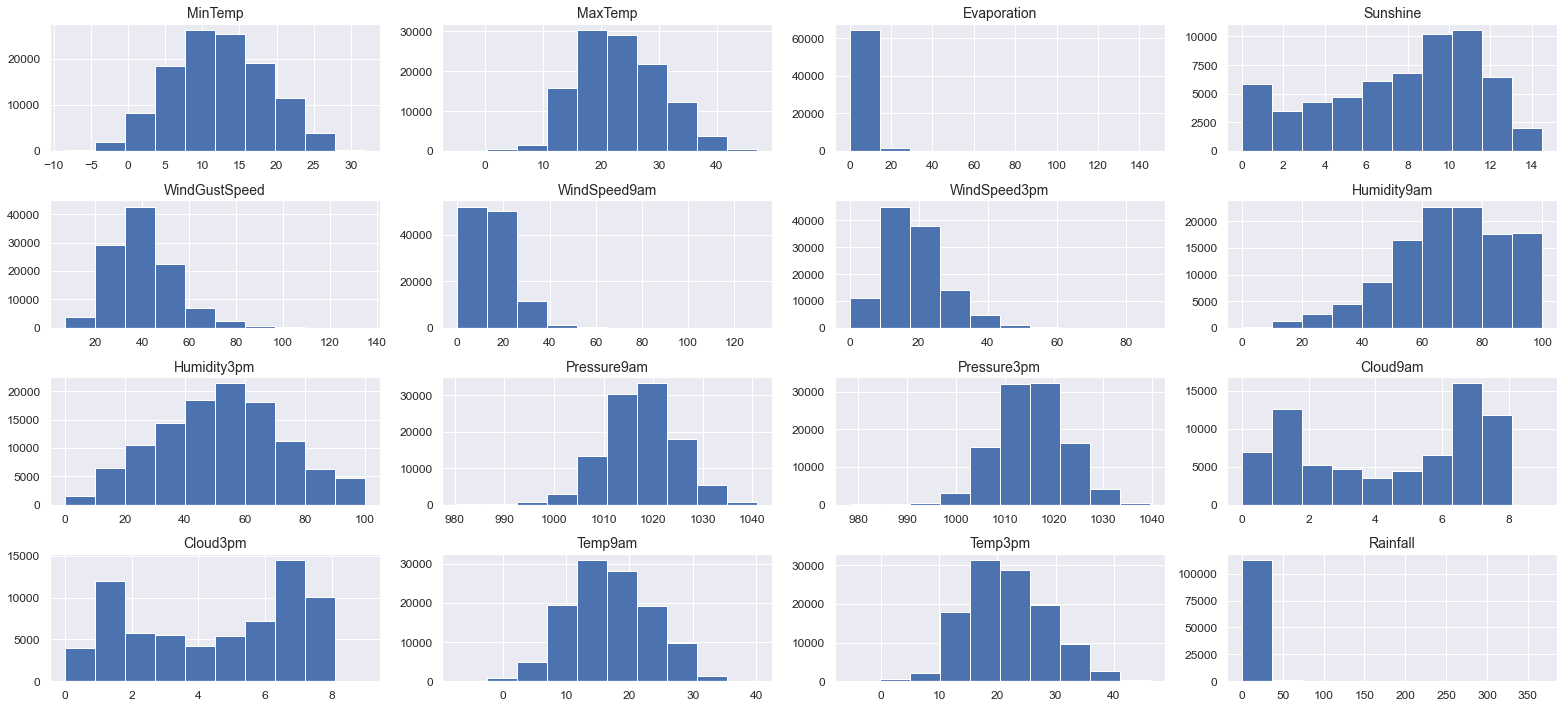

In [15]:
display_dataset_distributions(data)

In [16]:
# VEO CUANTAS ETIQUETAS TENGO POR ATRIBUTO CATEGORICO
data[categoric_label].nunique()

Date            3417
Location          49
WindGustDir       16
RainToday          2
RainTomorrow       2
dtype: int64

In [17]:
# m = len(data)
# fig,axes = plt.subplots(len(categoric_label),1,figsize=(18,len(categoric_label)*4))
# for i,col in enumerate(categoric_label):
#     temp_df = pd.Series(data[col].value_counts() / m)
#     temp_df.sort_values(ascending=False).plot.bar(ax=axes[i])
#     axes[i].set_xlabel(col)
#     axes[i].axhline(y=0.05, color='red') # 5%
#     axes[i].set_ylabel('Porcentaje de propiedades')
#     axes[i].set_xlabel('Categoría')
# plt.show()

In [18]:
# DEFINO PIPELINE PARA TRANSFORMAR LOS DATOS
    # DATOS NUMÉRICOS: BOX-COX
    # DATOS CATEGORICOS: ONE HOT ENCODING

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, QuantileTransformer


scaler = MinMaxScaler(feature_range=(1, 2)) # Box-Cox requiere que los valores de entrada sean positivos.
quantile = QuantileTransformer(output_distribution= 'normal')
power = PowerTransformer(method= 'box-cox' )

num_pipeline = Pipeline(steps=[
            ( 's' , scaler),
            ( 'p' , power),
            ('qt' , quantile)
])

num_attribs = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
cat_attribs = ['Date', 'Location', 'WindGustDir', 'RainToday', 'RainTomorrow']

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
#("cat", OneHotEncoder(), cat_attribs),
])

data_prepared = pd.DataFrame(full_pipeline.fit_transform(data), columns = data[numeric_label].columns)

In [19]:
data_prepared.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,1.046576,0.908975,2.128719,NaN,NaN,NaN,NaN,NaN,0.520661,NaN,NaN,NaN,-0.499230,NaN,0.949547,NaN
1,0.419741,2.063780,-5.199338,0.668997,NaN,-0.258792,-5.199338,-0.574595,0.266584,-1.346386,-0.101796,-0.422483,NaN,NaN,0.664287,2.144011
2,0.015055,-0.213636,-5.199338,0.440383,0.462610,-0.258792,-0.458426,-0.340163,-0.046436,0.048948,0.945616,0.743040,NaN,NaN,-0.370902,-0.180377
3,-1.352623,0.562796,-5.199338,0.645631,1.140077,-0.601439,-0.223916,-1.418119,-1.620592,-1.756055,0.114415,-0.156199,-0.161281,-1.055293,0.154930,0.668987
4,-1.611333,-0.475214,-5.199338,NaN,NaN,-0.427976,0.399276,-0.574595,-0.672129,-0.963423,1.629992,1.525529,NaN,NaN,-0.758004,-0.407442


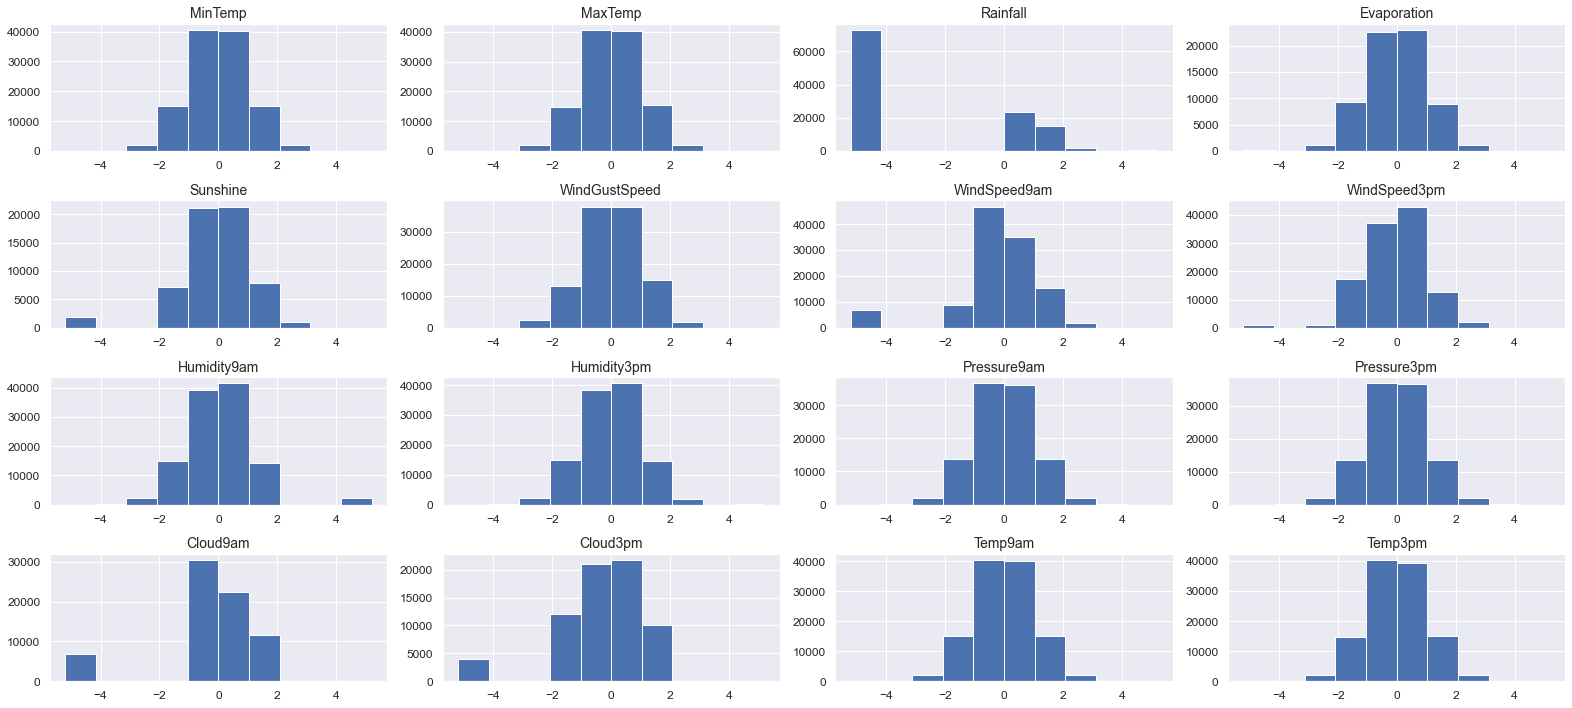

In [20]:
display_dataset_distributions(data_prepared)

In [21]:
# conda install -c conda-forge geopy

# OBTENGO COORDENADAS GEOGRÁFICAS PARA CADA LOCALIDAD

In [22]:
import geopy

In [23]:
from geopy.geocoders import Nominatim
import re

In [24]:
# BUSCO LAS COORDENAS GEOGRÁFICAS DE CADA NOMBRE
latitudes = []
longitudes = []
names = []
data['Latitude'] = np.zeros(len(data))
data['Longitude'] = np.zeros(len(data))

for i in data.Location.unique():
    name = i
    i = re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', i) # RegEx para insertar un espacio antes de las mayúsculas dentro del nombre
    geolocator = Nominatim(user_agent = 'Australia')
    location = geolocator.geocode(i + ' Australia')
    
    if location is not None: # Si encuentra el nombre de la localidad, guardo los valores de lat y long
        latitud = location.latitude
        longitud = location.longitude

    else: # Si el nombre no existe: guardo NAN en lat y long
        latitud = np.NAN
        longitud = np.NAN
    
    names.append(name)
    latitudes.append(latitud)
    longitudes.append(longitud)
    
    # Asigno los valores de lat y long según el nombre de la localidad a todas las filas con ese nombre
    data.loc[data['Location'] == name, ['Latitude']] = latitud
    data.loc[data['Location'] == name, ['Longitude']] = longitud

names = np.array(names)
latitudes = np.array(latitudes)
longitudes = np.array(longitudes)

In [25]:
np.vstack((names, longitudes, latitudes)).T

array([['Newcastle', '151.7795348', '-32.9192953'],
       ['Richmond', '142.9283602143393', '-20.569655'],
       ['Melbourne', '144.9631608', '-37.8142176'],
       ['Moree', '149.8407153', '-29.4617202'],
       ['Sydney', '151.2164539', '-33.8548157'],
       ['Canberra', '149.1012676', '-35.2975906'],
       ['Ballarat', '143.8605649', '-37.5623025'],
       ['GoldCoast', '153.4145987', '-28.0023731'],
       ['Albury', '146.9162795', '-36.0804766'],
       ['Penrith', '150.6941684', '-33.7510792'],
       ['Wollongong', '150.89385', '-34.4243941'],
       ['Walpole', '116.7310063', '-34.9776796'],
       ['Witchcliffe', '115.1004768', '-34.0263348'],
       ['CoffsHarbour', '153.1135293', '-30.2962407'],
       ['Watsonia', '145.083635', '-37.7110022'],
       ['Tuggeranong', '149.0921341', '-35.4209771'],
       ['Hobart', '147.3281233', '-42.8825088'],
       ['Nuriootpa', '138.9939006', '-34.4693354'],
       ['BadgerysCreek', '150.7441627', '-33.8816671'],
       ['MountGambi

In [26]:
coords_df = pd.DataFrame(np.vstack((names, longitudes, latitudes)).T)

In [27]:
coords_df.rename(columns = {0:'Location', 1:'Longitude', 2:'Latitude'}, inplace = True)

In [28]:
coords_df.head(20)

,Location,Longitude,Latitude
0,Newcastle,151.7795348,-32.9192953
1,Richmond,142.9283602143393,-20.569655
2,Melbourne,144.9631608,-37.8142176
3,Moree,149.8407153,-29.4617202
4,Sydney,151.2164539,-33.8548157
5,Canberra,149.1012676,-35.2975906
6,Ballarat,143.8605649,-37.5623025
7,GoldCoast,153.4145987,-28.0023731
8,Albury,146.9162795,-36.0804766
9,Penrith,150.6941684,-33.7510792


C:\Users\alexb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Latitud')

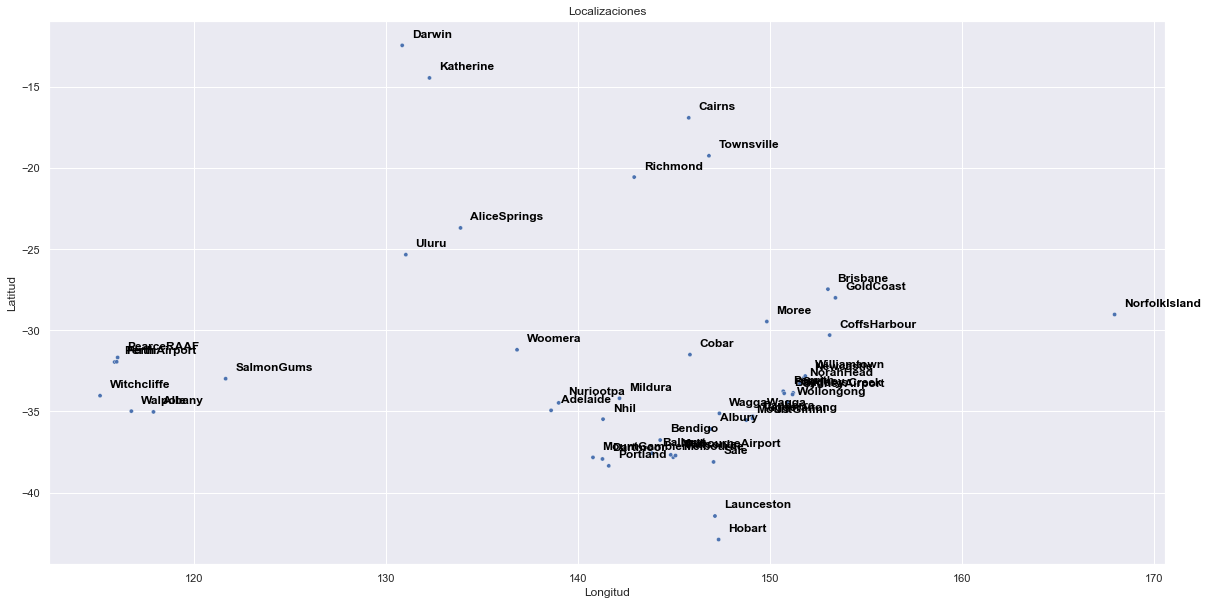

In [29]:
plt.figure(figsize=(20,10))
p1 = sns.scatterplot(longitudes,
                     latitudes,
                     size = 20,
                     legend=False)  

for line in range(0,coords_df.shape[0]):
     p1.text(longitudes[line]+0.5, latitudes[line]+0.5, 
     names[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

plt.title('Localizaciones')
# Set x-axis label
plt.xlabel('Longitud')
# Set y-axis label
plt.ylabel('Latitud')

<img src='https://upload.wikimedia.org/wikipedia/commons/b/b8/Australia-climate-map_MJC01.png' width="400"/>

Podemos observar que varias de las localidades están agrupadas en la zona Azul (templado). Luego hay otras en la zona más desértica del centro. Y por último, las que se encuentras ubicadas más al noter en la región tropical / ecuatorial.

Sería útil contar con una etiqueta que aproxime la pertenencia de cada ubicación a uno de estas regiones que poseen características climáticas diferentes. Por lo que aplico un algorítmo de clusterización para separarlos.

# IMPLEMENTO K-MEANS PARA AGRUPAR LAS LOCALIDADES SEGÚN SUS COORDENADAS GEOGRÁFICAS


In [30]:
from sklearn.cluster import KMeans

In [31]:
# Inicializo los centroides para acelerar la convergencia y que el agrupamiento represente mejor la distribución de los climas

init_centroids = np.array([[115, -35], [150, -35], [140, -15], [130, -25]])

In [32]:
clustering_model = KMeans(n_clusters = 4, n_init = 5, init = init_centroids)

In [33]:
X = np.array(coords_df[['Longitude', 'Latitude']])

In [34]:
y_pred_KMeans = clustering_model.fit_predict(X)

C:\Users\alexb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  self._check_params(X)


In [35]:
y_pred_KMeans[:20]

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [36]:
coords_df['cluster'] = y_pred_KMeans

In [37]:
coords_df.head()

,Location,Longitude,Latitude,cluster
0,Newcastle,151.7795348,-32.9192953,1
1,Richmond,142.9283602143393,-20.569655,2
2,Melbourne,144.9631608,-37.8142176,1
3,Moree,149.8407153,-29.4617202,1
4,Sydney,151.2164539,-33.8548157,1


C:\Users\alexb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Latitud')

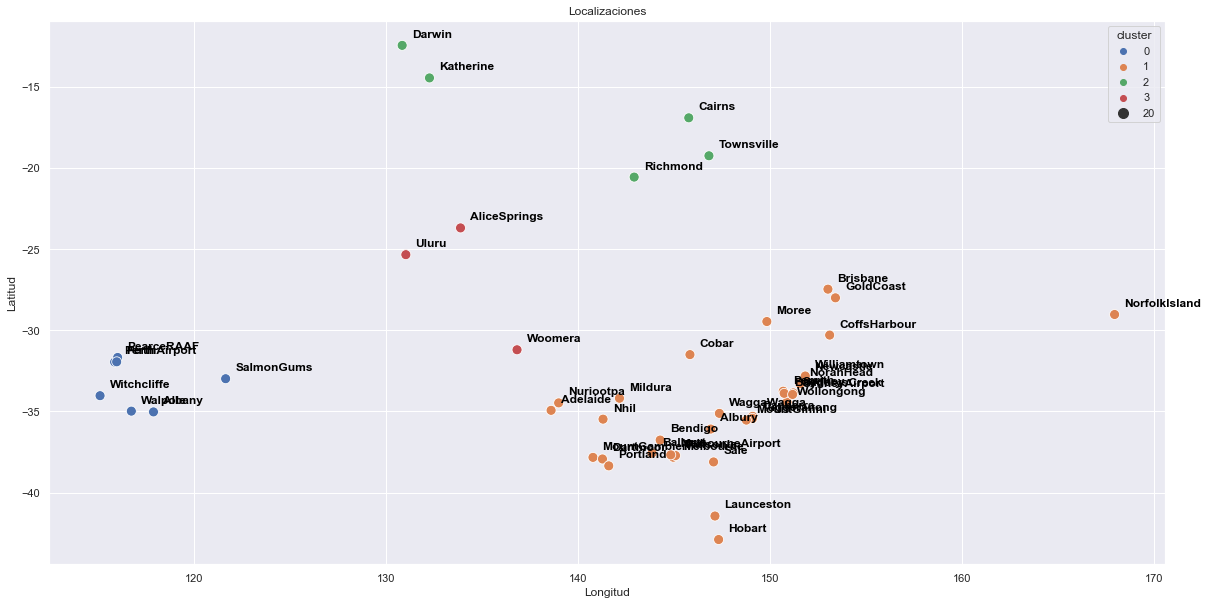

In [39]:
plt.figure(figsize=(20,10))
p1 = sns.scatterplot(longitudes,
                     latitudes,
                     size = 20,
                     sizes = (100,200),
                     legend=True,
                    hue = coords_df.cluster,
                    palette = 'deep')  

for line in range(0,coords_df.shape[0]):
     p1.text(longitudes[line]+0.5, latitudes[line]+0.5, 
     names[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

plt.title('Localizaciones')
# Set x-axis label
plt.xlabel('Longitud')
# Set y-axis label
plt.ylabel('Latitud')

De la clusterización obtenida podemos clasificar: 

**0 y 1**: Clima templado

**2**: Clima tropical / ecuatorial

**3**: Clima desértico

In [41]:
data['cluster'] = np.zeros(len(data)) 

In [55]:
for i in coords_df.Location:
    print(coords_df[coords_df['Location'] == i]['cluster'])
    coords_df.get_value[coords_df['Location'] == i].cluster
    #data.loc[data['Location'] == i] = coords_df[coords_df['Location'] == i].cluster

0    1
Name: cluster, dtype: int32


AttributeError: 'DataFrame' object has no attribute 'get_value'